In [428]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import callbacks
from keras import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Reshape
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [429]:
dataset = pd.read_csv('Sensor_Data.csv')
dataset.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel,Label
0,11.375000,11.307097,-0.103000,0
1,11.366708,11.255964,-0.353946,0
2,11.362331,11.249115,-0.090962,0
3,11.358665,11.263280,-0.043470,0
4,11.356745,11.270361,-0.037579,0


In [430]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [431]:
print(X)

[[ 1.13750000e+01  1.13070970e+01 -1.03000000e-01]
 [ 1.13667084e+01  1.12559635e+01 -3.53945898e-01]
 [ 1.13623313e+01  1.12491151e+01 -9.09619710e-02]
 ...
 [ 2.32423606e+01  2.28269192e+01  9.58238200e-03]
 [ 2.32450250e+01  2.28273425e+01  2.10957960e-02]
 [ 2.32477198e+01  2.27922496e+01  2.94987900e-02]]


In [432]:
print(y)

[0 0 0 ... 1 1 1]


In [433]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [434]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [435]:

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim = 3))
ann.add(tf.keras.layers.Dense(units=56, activation='relu'))
ann.add(tf.keras.layers.Dense(units=48, activation='relu'))
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
#opt = Adam(learning_rate=0.002)
ann.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = ann.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)


Epoch 1/50


298/298 [==============================] - 2s 4ms/step - loss: 0.4642 - accuracy: 0.8336 - val_loss: 0.4415 - val_accuracy: 0.8249
Epoch 2/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.8483 - val_loss: 0.3578 - val_accuracy: 0.8643
Epoch 3/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8697 - val_loss: 0.3491 - val_accuracy: 0.8622
Epoch 4/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8748 - val_loss: 0.3312 - val_accuracy: 0.8784
Epoch 5/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8761 - val_loss: 0.3556 - val_accuracy: 0.8635
Epoch 6/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8769 - val_loss: 0.3271 - val_accuracy: 0.8754
Epoch 7/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8786 - val_loss: 0.3265 - val_accuracy: 0.8727
Epoch 8/50
298/29

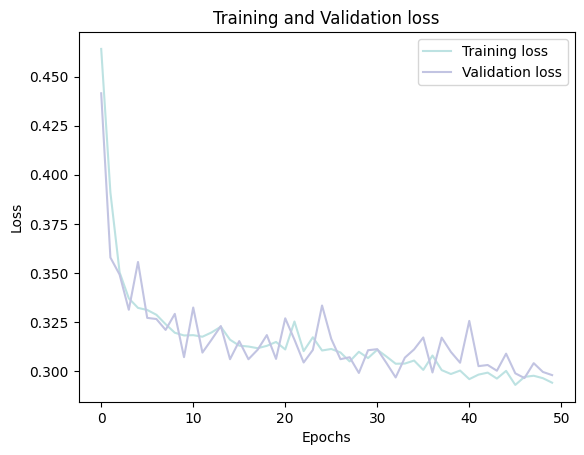

In [436]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], "#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

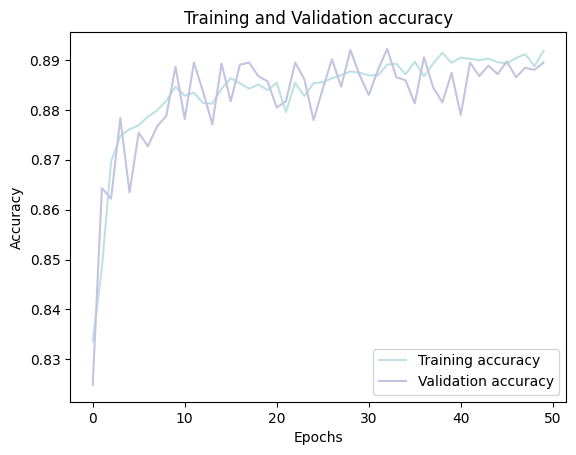

In [437]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],
         "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

187/187 [==============================] - 0s 1ms/step


<Axes: >

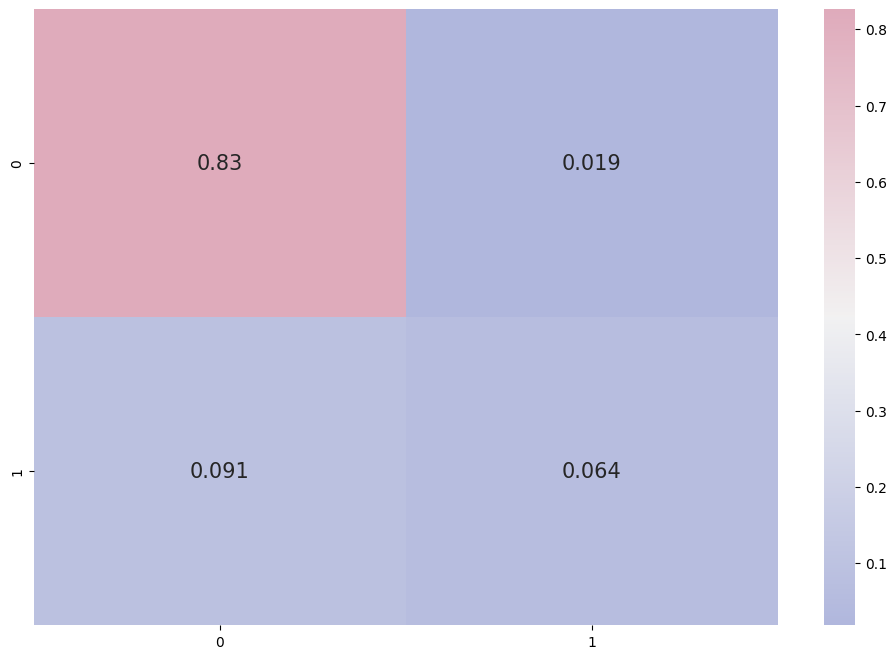

In [438]:
# Predicting the test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# confusion matrix
cmap1 = sns.diverging_palette(260, -10, s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12, 8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap1,
            annot=True, annot_kws={'size': 15})

In [439]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5035
           1       0.78      0.41      0.54       925

    accuracy                           0.89      5960
   macro avg       0.84      0.70      0.74      5960
weighted avg       0.88      0.89      0.88      5960



In [440]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy : " , accuracy_score(y_test, y_pred))
print("Precision : " , precision_score(y_test, y_pred))
print("F1-Score : " , f1_score(y_test, y_pred))
print("Recall : " , recall_score(y_test, y_pred))

[[4924  111]
 [ 542  383]]
Accuracy :  0.8904362416107383
Precision :  0.7753036437246964
F1-Score :  0.5398167723749119
Recall :  0.41405405405405404
